
# Introduction (Kevin)

This document is the final report of our Data Science Projet 3A.

We participated in a Kaggle competition named **House Prices: Advanced Regression Techniques**. The competition started the and ended the. The idea is to predict the price of a house using various attributes. Here is Kaggle's description of the competition:

*"Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home. "* --- Kaggle website

Attending this competition we agreed on the fact that the success of this project would depend on three goals/criterias

**Objective 1: Concretly learn and be able to compute machine learning techniques**

As a consequence we will try to present lots of techniques, even if they are not used in our final code. We will also try to insist on some theorical particularities and nuances of the different algorithms.

**Objective 2: Compete **

The "challenge" aspect of the project is one of the thing that motivated us the most. Nevertheless, competition is fierce. At the end of the challenge there were more than XXXX teams enrolled. We managed to reach the rank of XXX which positions us in the top XXX%. 

**Objective 3: Show and present the results**

We are actually speaking of this report. Being able to present nicely some results is sometimes even more important than the results themselves. This project is also the occasion to train our skills on R or Jupyter, to be able to compute clear graphs and bring out the structure and the ideas of our code in the most visual and intuitive way.

# Data exploration and analysis

Un petit blabla d'introduction


## Features distributions (Skander)

On etudie les distributions, le mieux étant d'avoir quelque chose de centré, symetrique...
Détailler l'utilisation de la fonction skew de scipy.stat pour déterminé sur qui appliquer le log.
Détaillé aussi les formules qui explique pourquoi le log.

In [16]:

from __future__ import division, print_function
import os
import sys
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try :
    import seaborn as sns; sns.set()
except ImportError:
    print("seaborn not found on your computer. "
          "Install it if you want pretty charts \n"
          "If you have internet access you can run in a cell : \n"
          "!pip install -U seaborn ")

pd.set_option('display.max_columns', None)
%matplotlib inline


In [17]:
train = pd.read_csv("train.csv",index_col = 0)
train.loc[train['PoolQC'].isnull(),'PoolQC'] = 'N.a'
train.loc[train['Fence'].isnull(),'Fence'] = 'N.a'
train.loc[train['MiscFeature'].isnull(),'MiscFeature'] = 'N.a'
train.loc[train['GarageCond'].isnull(),'GarageCond'] = 'N.a'
train.loc[train['GarageQual'].isnull(),'GarageQual'] = 'N.a'
train.loc[train['GarageFinish'].isnull(),'GarageFinish'] = 'N.a'
train.loc[train['GarageType'].isnull(),'GarageType'] = 'N.a'
train.loc[train['FireplaceQu'].isnull(),'FireplaceQu'] = 'N.a'
train.loc[train['BsmtFinType2'].isnull(),'BsmtFinType2'] = 'N.a'
train.loc[train['BsmtFinType1'].isnull(),'BsmtFinType1'] = 'N.a'
train.loc[train['BsmtExposure'].isnull(),'BsmtExposure'] = 'N.a'
train.loc[train['BsmtCond'].isnull(),'BsmtCond'] = 'N.a'
train.loc[train['BsmtQual'].isnull(),'BsmtQual'] = 'N.a'
train.loc[train['Alley'].isnull(),'Alley'] = 'N.a'

y_tr = train[['SalePrice']]
X_tr = train.drop('SalePrice',axis = 1)


Let's look at the distribution of the differents features.

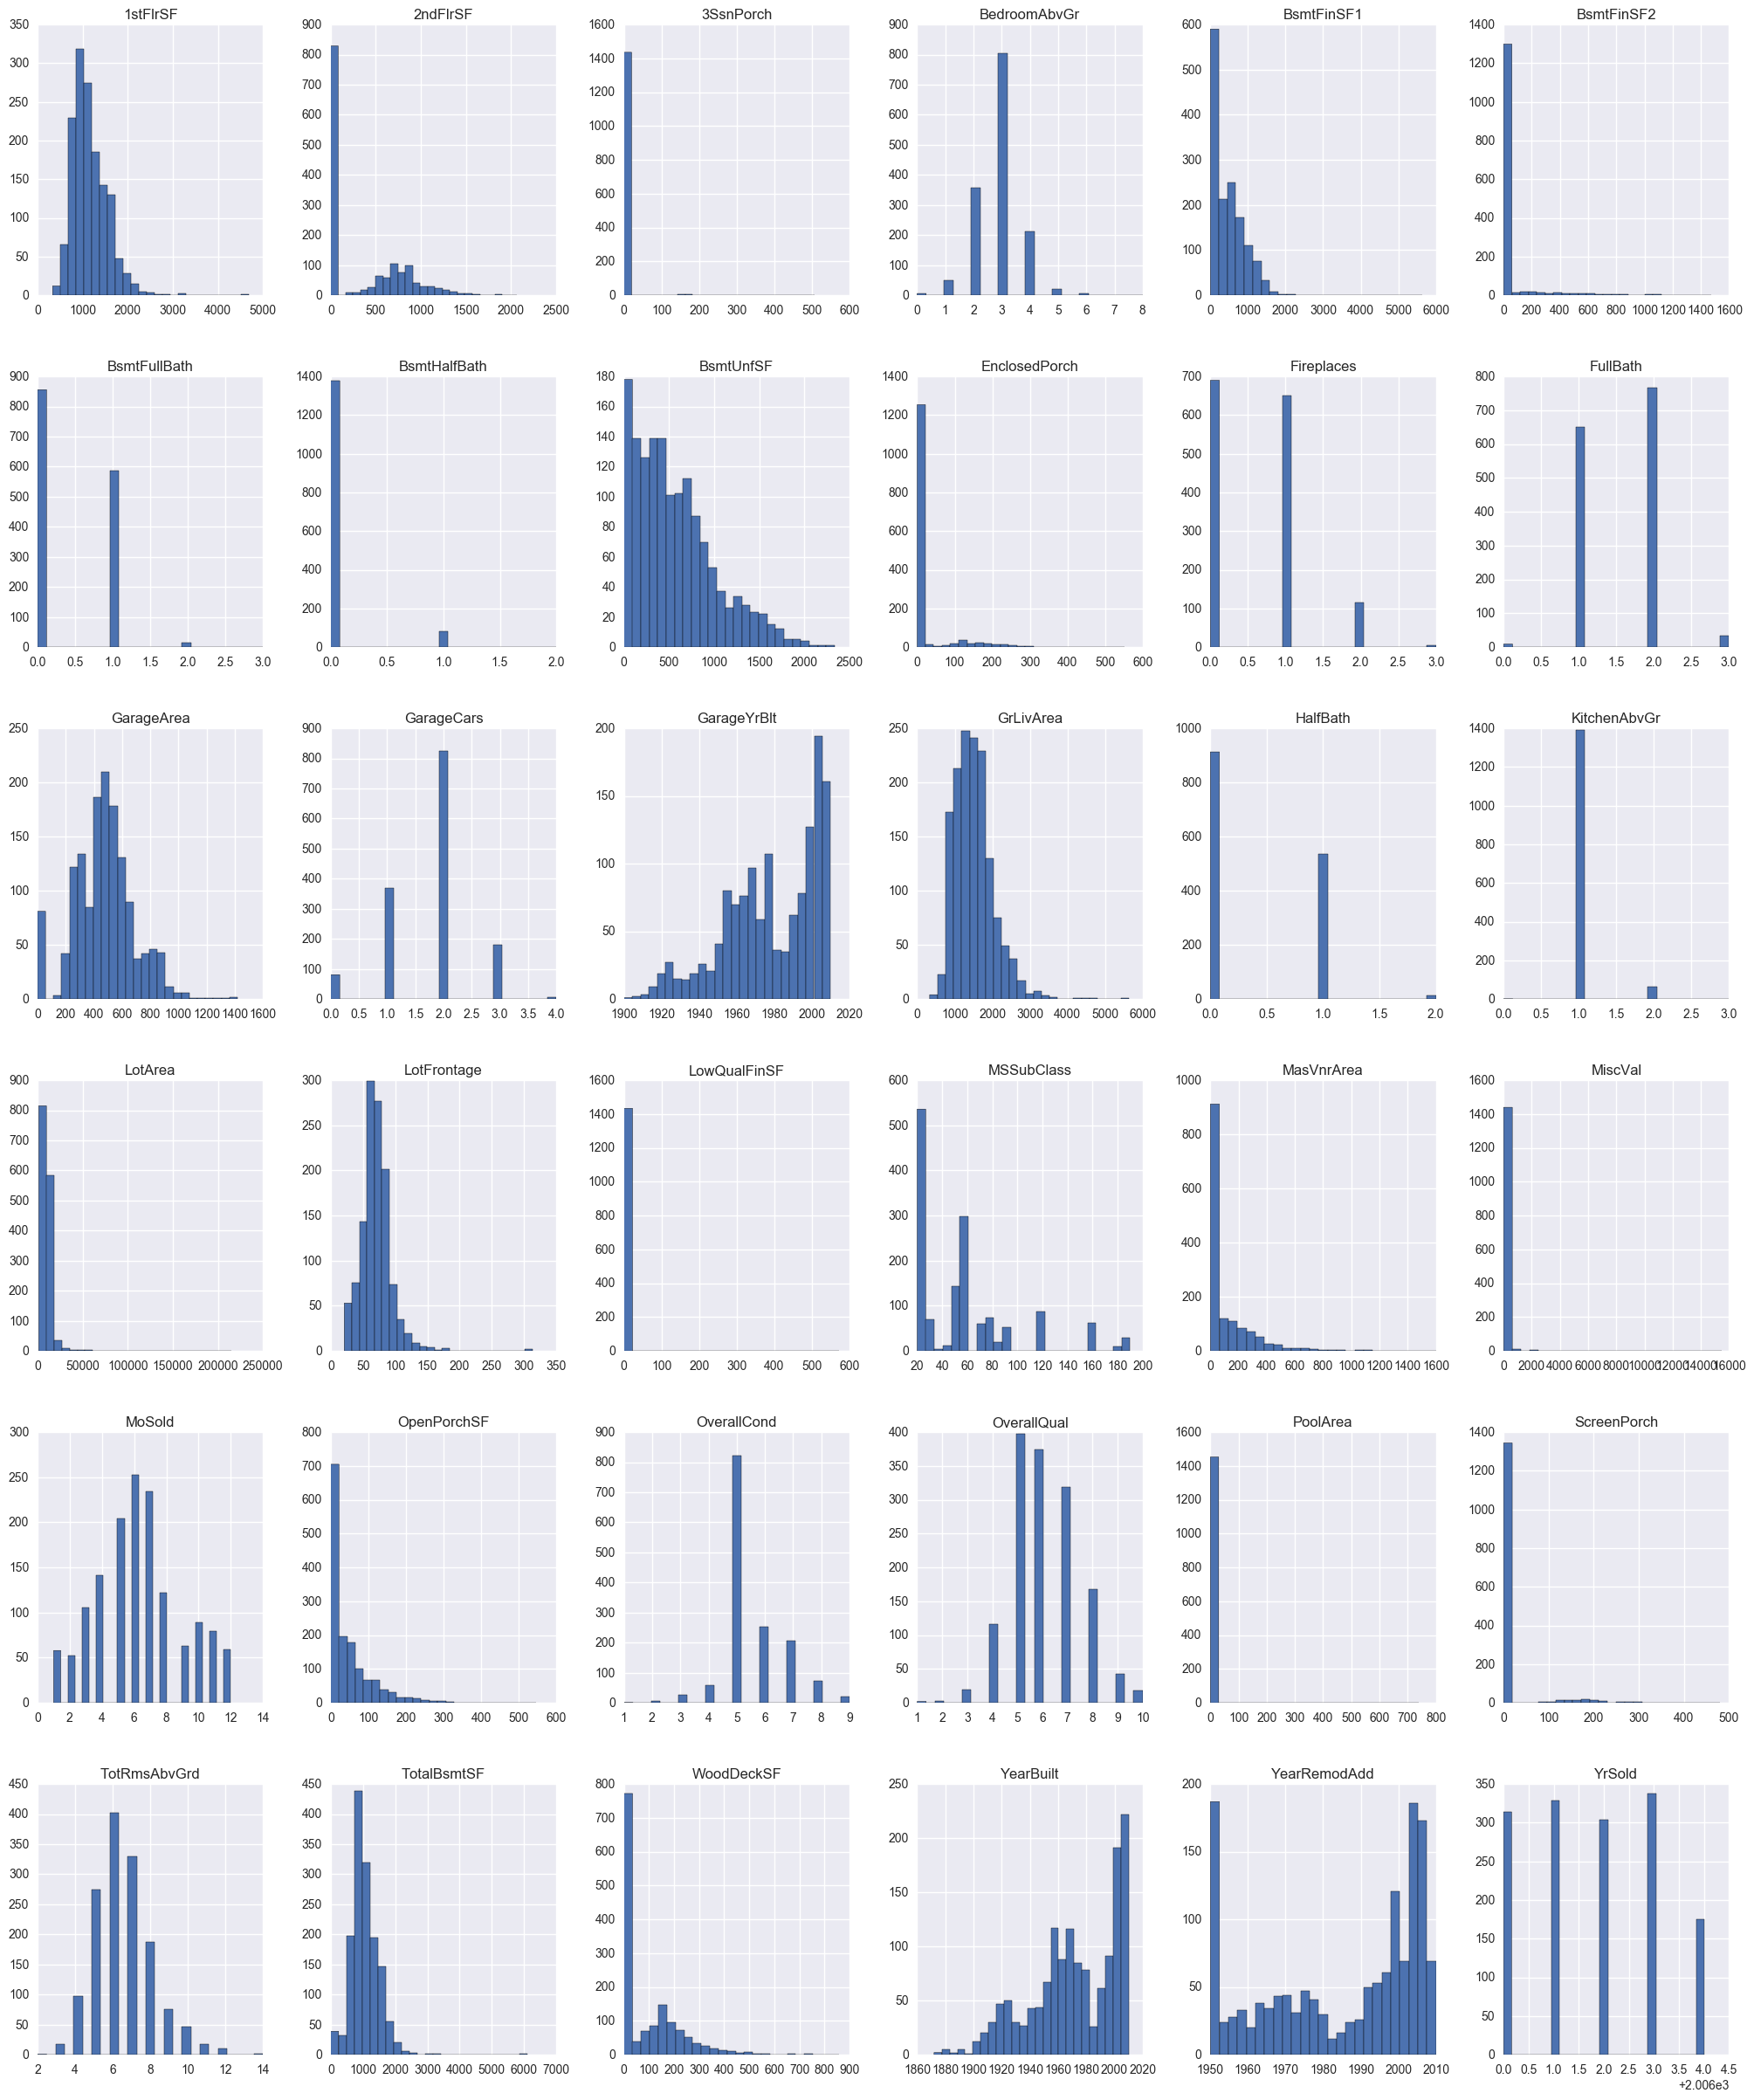

In [3]:
X_tr.hist(figsize=(25, 30), bins=25);

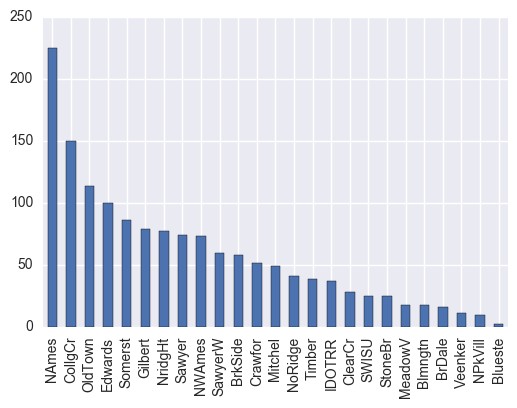

In [4]:
X_tr.Neighborhood.value_counts().plot(kind='bar');

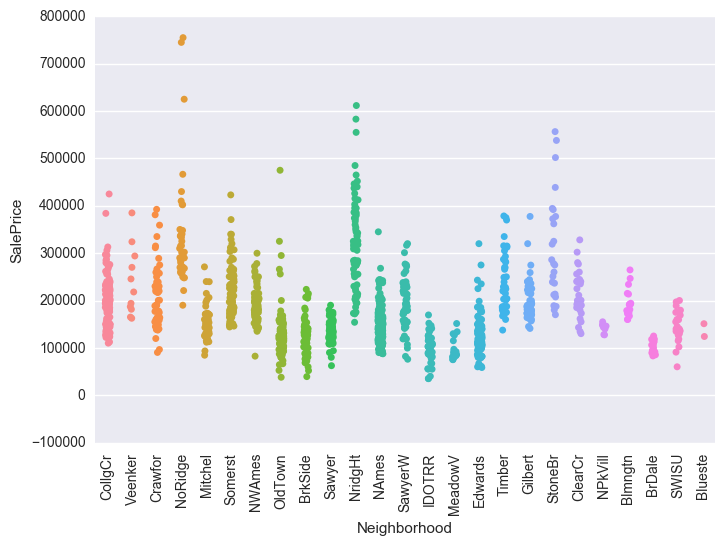

In [5]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
sns.stripplot(x="Neighborhood", y="SalePrice",\
              data=train.loc[:,['Neighborhood','SalePrice']],\
              jitter = True)
plt.xticks(rotation=90);

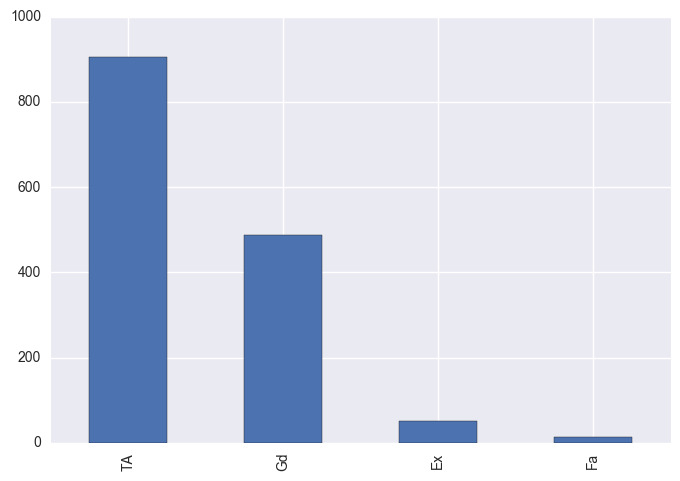

In [6]:
X_tr.ExterQual.value_counts().plot(kind='bar');

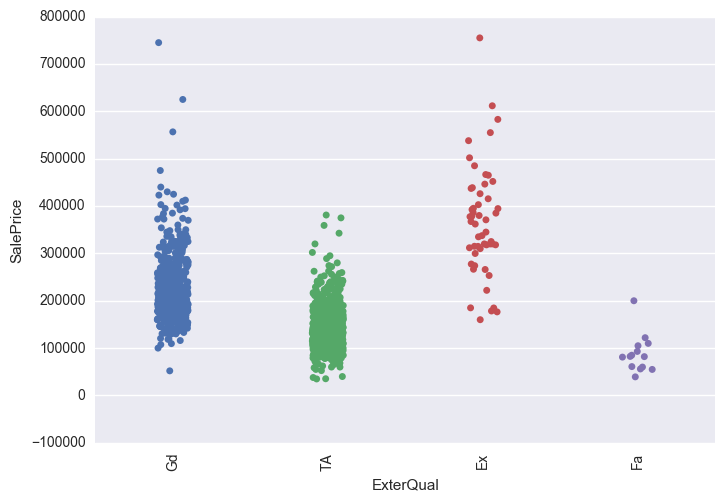

In [7]:
sns.set(style="darkgrid", color_codes=True)
sns.stripplot(x="ExterQual", y="SalePrice",\
              data=train.loc[:,['ExterQual','SalePrice']],\
              jitter = True)
plt.xticks(rotation=90);

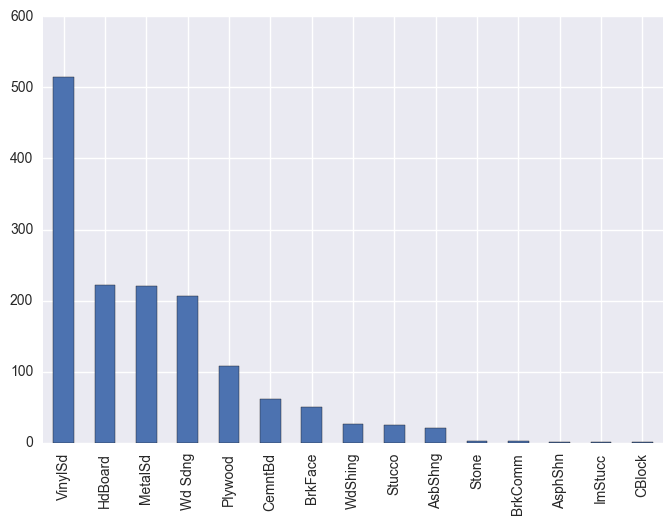

In [8]:
X_tr.Exterior1st.value_counts().plot(kind='bar');

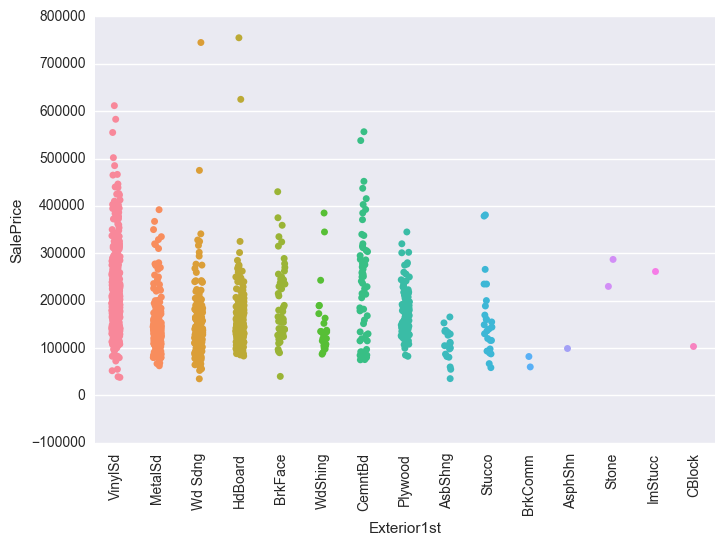

In [9]:
sns.set(style="darkgrid", color_codes=True)
sns.stripplot(x="Exterior1st", y="SalePrice", \
              data=train.loc[:,['Exterior1st','SalePrice']],\
              jitter = True)
plt.xticks(rotation=90);

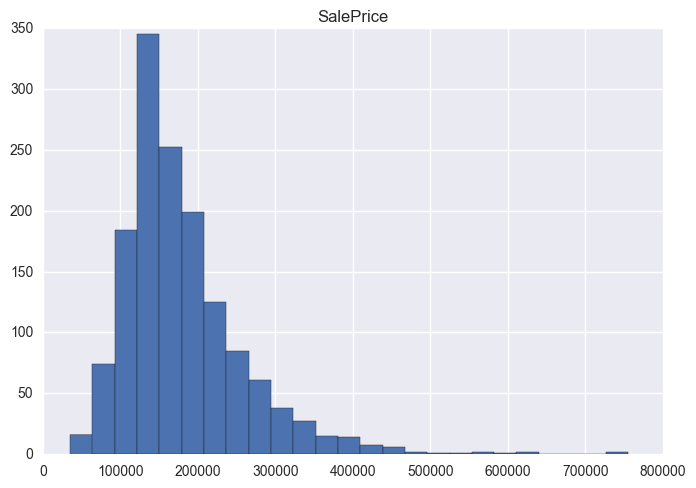

In [10]:
y_tr.hist(bins = 25);

In [3]:
y_tr = np.log(y_tr)

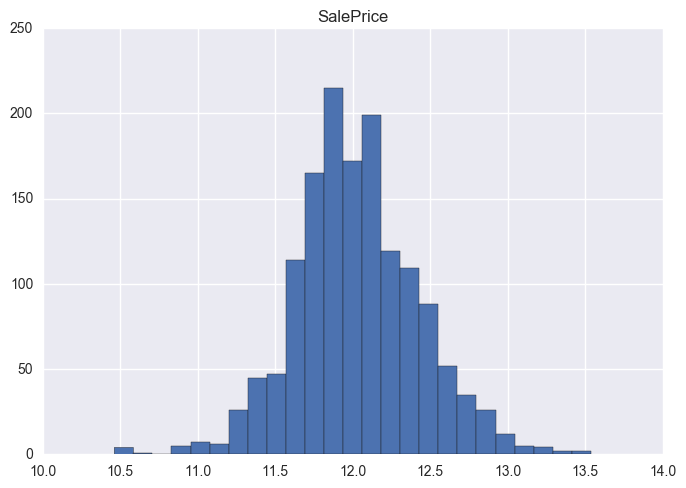

In [12]:
y_tr.hist(bins = 25);

## Features importance (Mathieu)


Once we have explored the data, we can interest ourselves in the features importance.

Due to the concrete aspect of the challenge, we could think ; without using any algorithm ; about which features is important or not and how much.

However there are many features, and it's difficult to see if the size of the garage is more important than the quality of the exterior. Thus we are going to apply algorithms to our data in order to get an idea of the features importance.

The first thing we could think of would be to fit a linear regression on our data and look at the coefficient of the regression to see which features counts and which doesn't. To do that we have to assure that the data are normalised, indeed if it is not the case features with high values as the lot area would have very small coefficient in comparison to features as the overall quality which only takes values between 1 and 10. 

Here we'll scale the data to have values between 0 and 1. Also we'll use Lasso linear regression instead of a classical linear regression because we've got a lot of features and Lasso helps us to pick the most interesting ones (Lasso procedure will be detailled in the fourth part of this report).

0.131683876947


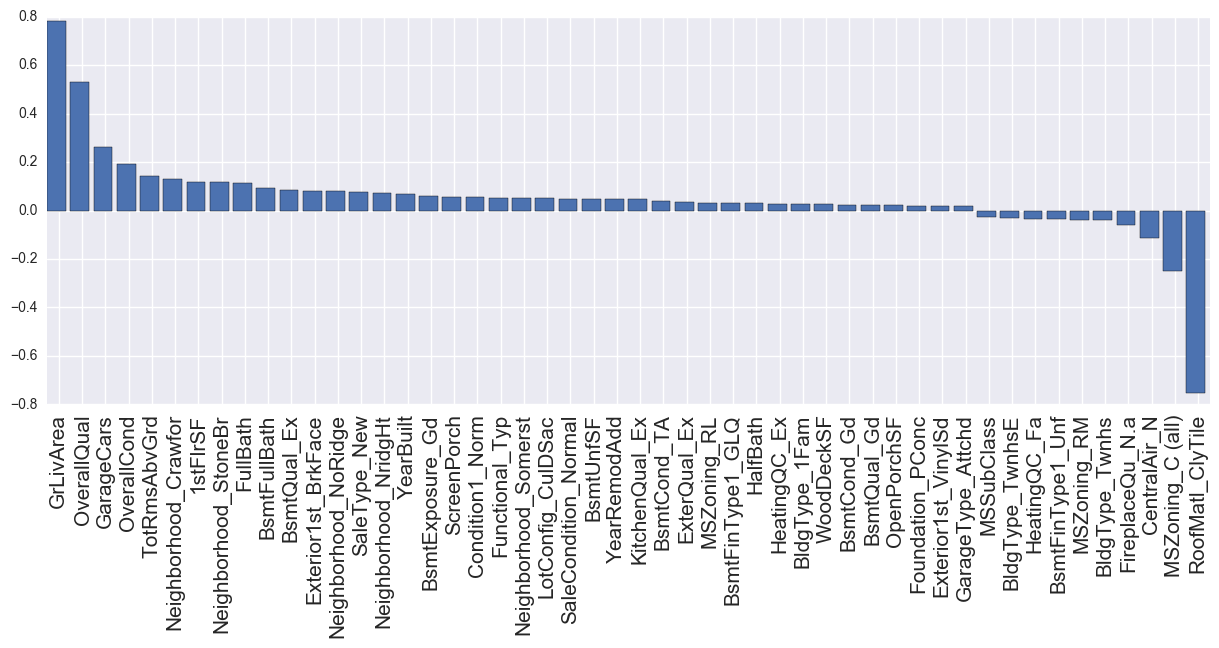

In [4]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt


X_df = pd.get_dummies(X_tr)

X_df.fillna(X_df.mean(),inplace = True)
plt.figure(figsize=(15, 5))


X = MinMaxScaler().fit_transform(X_df)
y = y_tr.values
skf = KFold(n_splits = 2,shuffle = True,random_state = 7)

valid_train_is, valid_test_is = list(skf.split(X, y))[0]

X_valid_train = X[valid_train_is]
y_valid_train = y[valid_train_is]
X_valid_test = X[valid_test_is]
y_valid_test = y[valid_test_is]


reg = Lasso(0.001)
reg.fit(X_valid_train, y_valid_train)

print(sqrt(mean_squared_error(y_valid_test,reg.predict(X_valid_test))))

l = np.concatenate([np.arange(0,40),np.arange(292,302)])
ordering = np.argsort(reg.coef_)[::-1][l]

importances = reg.coef_[ordering]

feature_names = X_df.columns[ordering]

x = np.arange(len(feature_names))
plt.bar(x, importances)
plt.xticks(x + 0.5, feature_names, rotation=90, fontsize=15);

We have drawn the values of the 40 higher positive coefficients and the values of the 10 higher negative coefficients. From this plot, we can interpret that features as GrLivArea, OverallQual, GarageCars  make the price increase when they increase, and that features like "RoofMatl is ClyTile" or "no Central Air" make the price decrease.

We can use other algorithms to try to understand the features importance in this problem. For instance we are going to apply a random forest algorithm to our data in order to get an idea of what features matter the most.  However, unlike the linear model, we don't get directly a quantity which allows us to compare the features.

On way to obtain a quantity that could describe the features importance using random forest regression would be the following :

- for each tree in the forest :
the importance associated with the features f would be the mean of the error reduction for each node involving f, weighted by the number of sample coming to that node. Where the error reduction of a node would be the sum of the errors of prediction for the node's incoming samples minus the sum of the errors of prediction after the node's split.
Here we are working with the mean squared error.

- the quantity obtained for one tree would be averaged for all the tree in the forest

This quantity describe the importance of a feature linked to its power to decrease the training error. In other words, a feature is important if  splitting according to this feature allows to reduce a lot the internal error.

In sklearn we have access to the feature importances through the feature_importances attribute of the RandomForestRegressor class.

/Users/mathieubarre/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.145460712565


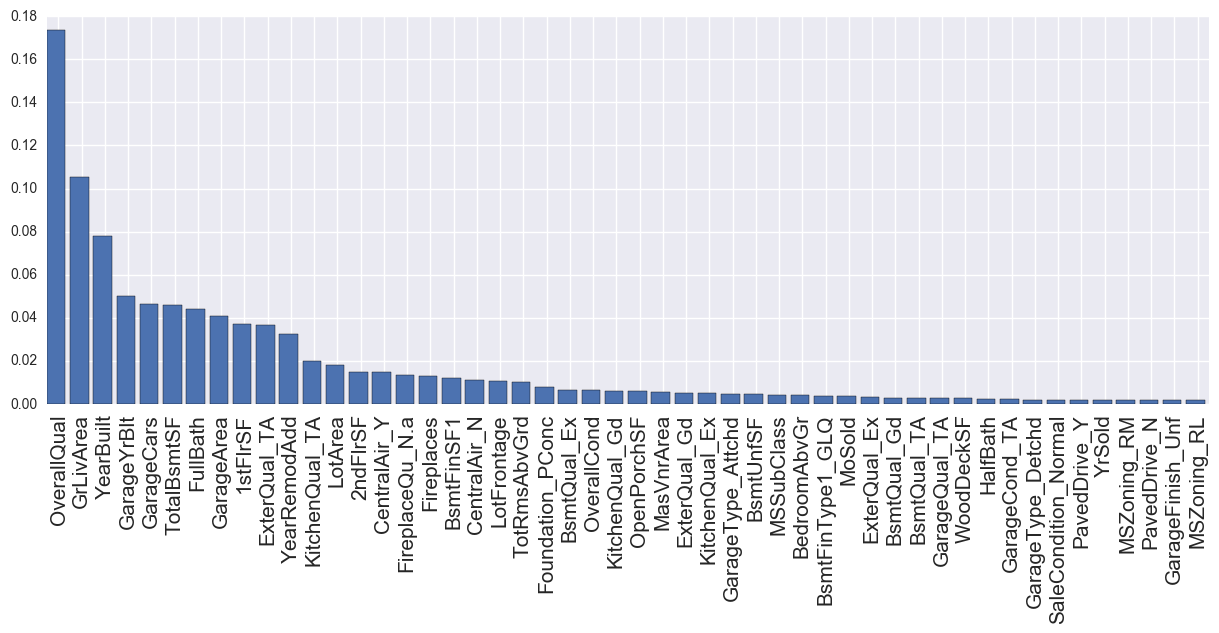

In [9]:
from sklearn.ensemble import RandomForestRegressor


X_df = pd.get_dummies(X_tr)
X_df.fillna(X_df.mean(),inplace = True)

plt.figure(figsize=(15, 5))

X = X_df.values
y = y_tr.values
skf = KFold(n_splits = 2,shuffle = True,random_state = 7)

valid_train_is, valid_test_is = list(skf.split(X, y))[0]

X_valid_train = X[valid_train_is]
y_valid_train = y[valid_train_is]
X_valid_test = X[valid_test_is]
y_valid_test = y[valid_test_is]


reg = RandomForestRegressor(n_estimators = 300,max_features = 0.2,\
                            max_depth = 12,min_samples_leaf = 2)
reg.fit(X_valid_train, y_valid_train)

print(sqrt(mean_squared_error(y_valid_test,reg.predict(X_valid_test))))

ordering = np.argsort(reg.feature_importances_)[::-1][:50]

importances = reg.feature_importances_[ordering]
feature_names = X_df.columns[ordering]

x = np.arange(len(feature_names))
plt.bar(x, importances)
plt.xticks(x + 0.5, feature_names, rotation=90, fontsize=15);

Here we printed the 50 most important features according to the random forest algorithm. We see that the top features are slightly different from those obtain through linear regression, however features as OverallQual, GarageSize or GrLivArea are still in top position, so we are confident they are really important features for our regression problem.

# Data preprocessing

blabla

## Symetrize distributions (Skander)

À voir comment partager entre ici et le 2.1 


## Missing values (Kevin)

Petite partie, il y en a pas beaucoup (à vérifier)
on fait simplement remplacement par la moyenne, et pas le plus courrant.
(peut être discuter de l'interet de prendre la moyenne et le plus courant sur test + train ensemble ou en séparé.

([<matplotlib.axis.XTick at 0x11c43cd50>,
 <a list of 19 Text xticklabel objects>)

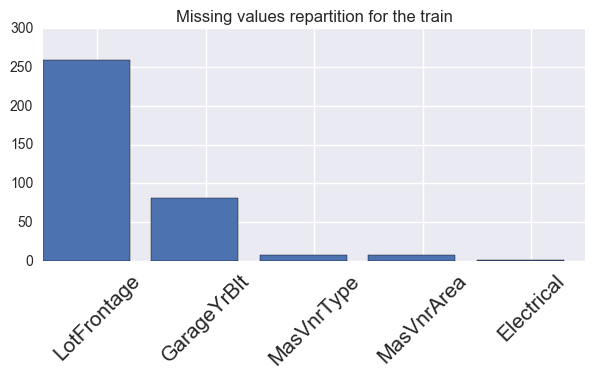

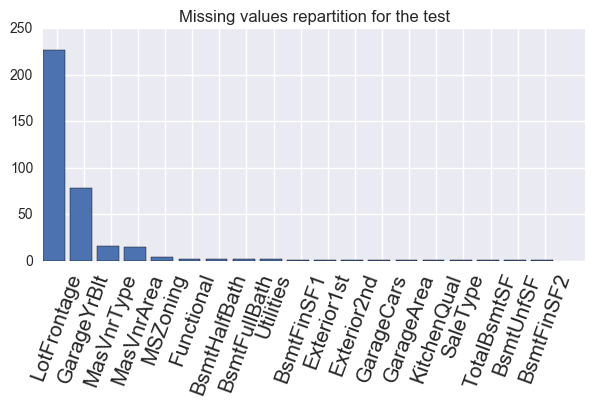

In [18]:
Count=X_tr.isnull().sum()
ordering = np.argsort(Count)[::-1]
Count=Count[ordering]
Count=Count[Count>0]

plt.figure(figsize=(7, 3))
x = np.arange(len(Count))
plt.bar(x, Count)
plt.title("Missing values repartition for the train")
plt.xticks(x + 0.5, Count.index, rotation=45, fontsize=15)

test = pd.read_csv("test.csv")

test.loc[test['PoolQC'].isnull(),'PoolQC'] = 'N.a'
test.loc[test['Fence'].isnull(),'Fence'] = 'N.a'
test.loc[test['MiscFeature'].isnull(),'MiscFeature'] = 'N.a'
test.loc[test['GarageCond'].isnull(),'GarageCond'] = 'N.a'
test.loc[test['GarageQual'].isnull(),'GarageQual'] = 'N.a'
test.loc[test['GarageFinish'].isnull(),'GarageFinish'] = 'N.a'
test.loc[test['GarageType'].isnull(),'GarageType'] = 'N.a'
test.loc[test['FireplaceQu'].isnull(),'FireplaceQu'] = 'N.a'
test.loc[test['BsmtFinType2'].isnull(),'BsmtFinType2'] = 'N.a'
test.loc[test['BsmtFinType1'].isnull(),'BsmtFinType1'] = 'N.a'
test.loc[test['BsmtExposure'].isnull(),'BsmtExposure'] = 'N.a'
test.loc[test['BsmtCond'].isnull(),'BsmtCond'] = 'N.a'
test.loc[test['BsmtQual'].isnull(),'BsmtQual'] = 'N.a'
test.loc[test['Alley'].isnull(),'Alley'] = 'N.a'

Count2=test.isnull().sum()
ordering = np.argsort(Count2)[::-1]
Count2=Count2[ordering]
Count2=Count2[Count2>0]

plt.figure(figsize=(7, 3))
x = np.arange(len(Count2))
plt.bar(x, Count2)
plt.title("Missing values repartition for the test")
plt.xticks(x + 0.5, Count2.index, rotation=70, fontsize=15)


The most incomplete column is "LotFrontage" in both cases. We can see that there are not so many missing values but it is still necessary to handle them in an intelligent way. 
In the competition we simply replaced them with mean values for quantitave attributes and most frequent value for qualitative attribute. 
However, we will here present another method which is theorically much more interesting. It uses PCA and replace the missing values with what can be seen as a regression of all the other columns. 
Here below a description of the IterativePCA algorithm from the EA class "R for statistics". 

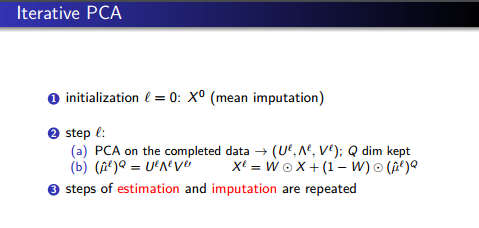

In [22]:
from IPython.display import Image
Image("Capture.png")

In [19]:
def IterativePCA(X_tr,n,dimension):
    
    Numeric_col=X_tr._get_numeric_data().columns
    X=X_tr._get_numeric_data()
    
    I=Imputer(strategy='mean')
    PCA1=PCA(n_components=dimension)
    S=StandardScaler()
    
    
    X_iter=I.fit_transform(X)
    X0=I.fit_transform(X)
    S.fit(X_iter)
    X_iter=S.transform(X_iter)
    X0=S.transform(X0)
    W=1*np.array(~X.isnull())
    
    for i in range(n):
        PCA1.fit(X_iter)
        X_iter=PCA1.inverse_transform(PCA1.transform(X_iter))
        X_iter=W*X0+(1-W)*X_iter
    X_iter=S.inverse_transform(X_iter)
    New=pd.DataFrame(X_iter,index=X.index,columns=X.columns)
    X_tr[col]=New
    return X_tr


Let's make a few remarks about what has been written:

- When the parameter "dimension" equals the size of the matrix, the function PCA.inverse_transform and PCA.transform are inverses. As a consequence the algorithm is equivalent to a simple mean imputation. In general, the best value of the "dimension" parameter has to be found by cross-validation

- It is important to scale the data before computing the PCA in order to deal with comparable standart deviations

- Here the algorithm has just been used to modify the train dataset. Obviously, the same idea can be applied to the test dataset. However, we will have to be careful about continuing to fit the scaler, the PCA and the Imputer on the train and not on the test dataset.

## Dealing with cathegorical features (Skander)


Ici on peut parler des différentes approches, on a choisit get_dummies mais comparer
parler du problème du drop_first ou non, alternative : ajouter la moyenne par quartier blabla

Détailler le code.

## Features engineering (Kevin)

Les features qu'on a essayé d'ajouter, le pourquoi.
peut être parler de la binarisation des variables continues

In [20]:
class Discretize():
    

    
    
    def __init__(self,quantil):
        self.quantil = quantil

        

    def fit(self,y):
        q=self.quantil

        s=np.arange(100/q+1)
        s=s*q
        self.table=np.percentile(y,s)
        return(self.table)
        
        
            
    def transform(self,y):
        table=self.table
        for i in range(len(y)):
            for j in range(len(table)):
                if (y.iloc[i]<table[j]):
                    y.iloc[i]=(table[j]+table[j-1])/2
                    break
        return(y)


# Prices predictions

blabla

## Evaluation of our model performances (Mathieu)

In Kaggle type competition, we have to predict values on a test set that we don't know the labels.
Due to the classical Bias-Variance trade-off we can't content ourselves to minimise the training error, and in particular the bias, which conducts irremediably to over-fitting.

To test the predictive power of our algorithms we have to split our train set into train/test sets in order to have a labelled test set. 
We use the K-folds method to obtain an estimation of our testing error.
Indeed we split our train set into K sets, and test our algorithm on each of this K sets after training it on the four others. We obtained K training errors that we can average.
Here we doesn't have any order between the samples, so we can split randomly to obtain the K sets.

In the literature K is often choose as 5 or 10, here we prefer choosing 5 folds because we don't have a large amount of train samples. 

We can use this computed test error to compare our different algorithms and in particular to choose the different hyper-parameters of our models.

We preferred recoding a cross validation function using K-fold so we could also deal with the preprocessing in the process. Indeed preprocessing should be done for each set of the split separately, especially when we use features as the mean of prices for each neighbourhoods (means should be calculated using only the train set because in the other case we use information of the test labels in our features, which leads to under estimation of the cross validation error).

In [5]:
from sklearn.model_selection import KFold
from preprocess import Preprocess


def RMSE(y,y_pred):
    return(np.sqrt(sum((y['SalePrice']-y_pred)**2)/len(y)))

def Dummies(X_train,X_test):
    tot = pd.concat([X_train,X_test],axis = 0)
    tot = pd.get_dummies(tot)
    return tot.iloc[:X_train.shape[0],:],tot.iloc[X_train.shape[0]:,:]

def crossVal(model,X,y,cv = 5):
    Kfold = KFold(n_splits=cv,shuffle=True,random_state=7)
    prep = Preprocess()
    res = []
    tr_error = []
    for train,test in  Kfold.split(X,y):
        X_train, X_test, y_train, y_test = X.iloc[train,:],X.iloc[test,:],y.iloc[train,:],y.iloc[test,:]
        prep.fit_cat(X_train,y_train)
        prep.fit_num(X_train,y_train)
        X_train_num = X_train.select_dtypes(include= ['int','float'])
        X_train_cat = X_train.select_dtypes(include = ['object'])
        X_train_num = prep.transform_num(X_train_num)
        X_train_cat = prep.transform_cat(X_train_cat)
        X_train_num.index = X_train_cat.index
        X_train = pd.concat([X_train_num,X_train_cat],axis = 1)
        X_test_num = X_test.select_dtypes(include= ['int','float'])
        X_test_cat = X_test.select_dtypes(include = ['object'])
        X_test_num = prep.transform_num(X_test_num,test = True)
        X_test_cat = prep.transform_cat(X_test_cat)
        X_test_num.index = X_test_cat.index
        X_test = pd.concat([X_test_num,X_test_cat],axis = 1)
        X_train,X_test = Dummies(X_train,X_test)
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        res.append(RMSE(y_test,y_pred))
        tr_error.append(RMSE(y_train,model.predict(X_train)))
    return np.mean(res),np.mean(tr_error)

/Users/mathieubarre/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/mathieubarre/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


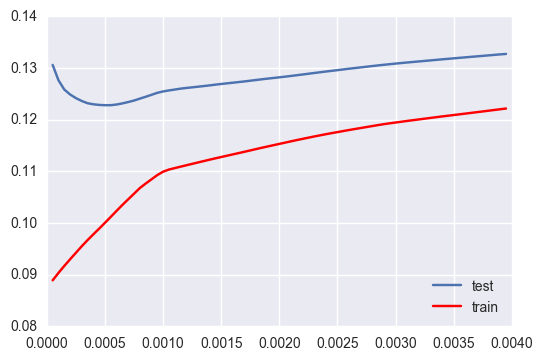

In [6]:

def plot_errorL(l):
    res = []
    trai = []
    for alpha in l:
        tst,tr = crossVal(Lasso(alpha=alpha),X_tr,y_tr)
        res.append(tst)
        trai.append(tr)
    plt.plot(l,res,label ='test')
    plt.plot(l,trai,label ='train',color = 'r')
    plt.legend(loc = 4)
    plt.show()

    
plot_errorL(np.arange(0.00005,0.004,0.00005))



Here we see, as we could expect, that test and train errors don't behave the same way, training error increase with the penalisation, whereas test error have a minimum for a $\lambda \ne 0$.

When there are many parameter to optimize, drawing curves is not more a option. We used the library $\textit{pysmac}$ and in particular the $\textit{fmin}$ function from the $\textit{optimize}$ module.
It performs a random search in a delimited domain for our hyper-parameters.

In [10]:
from pysmac.optimize import fmin

def objective_function(x_int):
    objective_function.n_iterations += 1
    n_estimators,max_depth,max_features =x_int
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    max_features = int(max_features)
    reg = RandomForestRegressor(n_estimators=n_estimators,\
                                max_depth=max_depth,\
                                max_features = max_features/10.0)
    score,tr = crossVal(reg, X_tr, y_tr)
    print (objective_function.n_iterations, \
        ":\t n_estimators = ", n_estimators, \
        "\n\t max_depth = ", max_depth,\
        "\n\t max_features = ", max_features/10.0, \
        "\n\t rmse = ", score)
    return score

In [11]:
objective_function.n_iterations = 0
xmin, fval = fmin(objective_function,\
                  x0_int=(10,5,2), xmin_int=(10,5,2), xmax_int=(100,20,10),\
                  max_evaluations=10)

/Users/mathieubarre/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 :	 n_estimators =  10 
	 max_depth =  5 
	 max_features =  0.2 
	 rmse =  0.161390931895
Number of evaluations 1, current fmin: 0.161391
2 :	 n_estimators =  17 
	 max_depth =  15 
	 max_features =  0.8 
	 rmse =  0.142556907736
Number of evaluations 2, current fmin: 0.142557
3 :	 n_estimators =  71 
	 max_depth =  8 
	 max_features =  0.4 
	 rmse =  0.136739962875
Number of evaluations 3, current fmin: 0.136740
4 :	 n_estimators =  19 
	 max_depth =  11 
	 max_features =  0.7 
	 rmse =  0.143448228729
5 :	 n_estimators =  91 
	 max_depth =  8 
	 max_features =  0.7 
	 rmse =  0.141032242796
6 :	 n_estimators =  100 
	 max_depth =  10 
	 max_features =  1.0 
	 rmse =  0.141007223041
7 :	 n_estimators =  54 
	 max_depth =  7 
	 max_features =  0.5 
	 rmse =  0.142248649602
8 :	 n_estimators =  65 
	 max_depth =  6 
	 max_features =  0.3 
	 rmse =  0.146495027292
9 :	 n_estimators =  97 
	 max_depth =  14 
	 max_features =  0.2 
	 rmse =  0.134026441548
Number of evaluations 9, current

## Linear models (Kevin)

parler de lasso, de ridge de elastic net, balancer toute la théorie qu'on a dessus vu en stats et en ML2.
Parler de Adaptative Lasso.

Classical linear model :
$$Y=X\beta^*+\epsilon$$

Least-squares minimisation:
$$\hat{\beta}\in argmin_{\beta}||Y-X\beta||^2$$

Ridge minimisation:
$$\hat{\beta}\in argmin_{\beta}||Y-X\beta||^2+\lambda||\beta||^2$$

Lasso minimisation:
$$\hat{\beta}\in argmin_{\beta}||Y-X\beta||^2+\lambda|\beta|_{l^1}$$

One possible advantage of Ridge and Lasso compared to the classical Least-squares method is that they penalyse complex models. As a consequence, the results obtained will have less chances to overfitt, problem which is all the plausible when there aren't so many instances like in this dataset.

Now the thing is that Ridge and Lasso penalise in different ways. Lasso is much more direct with attributes in the sens that it will set to zero more easily attributes that are not so much correlated to the target and when two attributes are very similar the chances are that one of the gets truncated. On the contrary the risk with Ridge is that it may be too sensible to noise or uncorrelated attirubutes. 

A solution is known as elastic Net. This can be seen as a sort of compromise between the two penalisations. 

Elastic net:

$$\hat{\beta}\in argmin_{\beta}||Y-X\beta||^2+\lambda|\beta|_{l^1}+\mu||\beta||^2$$


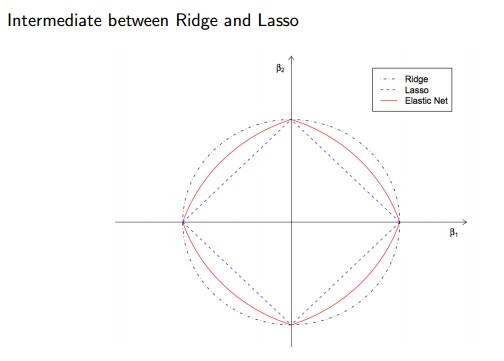

In [21]:
from IPython.display import Image
Image("Lasso.png")

In [23]:
from sklearn.linear_model import Lasso
import numpy as np


class AdaptativeLasso():
    

    
    
    def __init__(self,alpha,n_iter):
        self.alpha = alpha
        self.n_iter = n_iter
        
    def get_params(self,deep =True):
        out = dict()
        out['alpha']= self.alpha
        out['n_iter']= self.n_iter
        return out
        
    def fit(self,X,y):
        gprime = lambda w: 1. / \
        (2. * np.sqrt(np.abs(w)) + np.finfo(float).eps)
        n_samples, n_features = X.shape

        self.weights = np.ones(n_features)
        n_lasso_iterations = self.n_iter

        for k in range(n_lasso_iterations):
            X_w = X / self.weights
            clf = Lasso(alpha=self.alpha)
            clf.fit(X_w, y)
            coef_ = clf.coef_ / self.weights
            self.weights = gprime(coef_)
        self.clf = Lasso(self.alpha);
        self.clf.fit(X / self.weights,y)
        
            
    def predict(self,X):
        return self.clf.predict(X / self.weights)

## Random Forests (Skander)

parler de random forests, la théorie, mettre le truc de kegl derrière

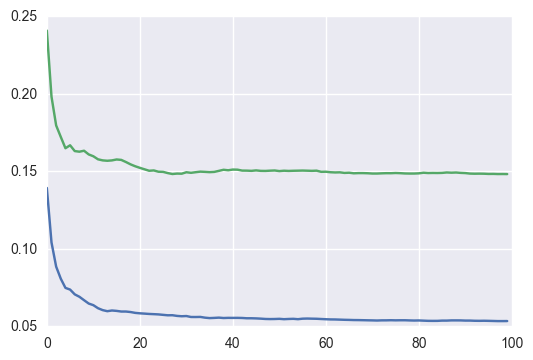

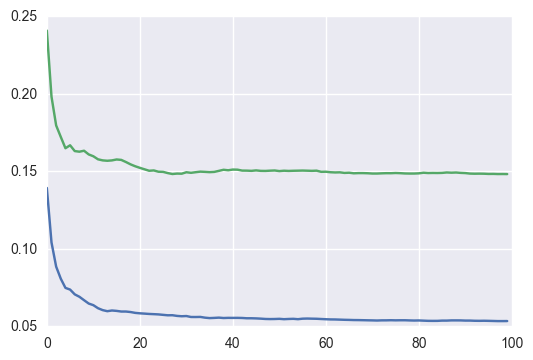

In [13]:
import pylab as pyl
from time import sleep
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from IPython import display
from math import sqrt

X = pd.get_dummies(X_tr)
X.fillna(X.mean(),inplace = True)

X=X.values
Y = y_tr.values 

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=61)



max_depth = 14 # tree depth
n_trees = 100 # number of trees
max_features = 0.2 # number of random features at each cut
n_samples = X_train.shape[0]

ts = pyl.arange(n_trees)
training_errors = []
test_errors = []
y_pred_train = np.zeros(len(y_train))
y_pred_test = np.zeros(len(y_test))

for t in range(n_trees):

    train = np.random.choice(range(X_train.shape[0]),X_train.shape[0])
    clf = DecisionTreeRegressor(max_features = max_features,\
                                max_depth = max_depth)
    clf.fit(X_train[train,:],y_train[train])
    pyl.clf()
    y_pred_train = (y_pred_train*t + clf.predict(X_train))/(t+1)
    y_pred_test = (y_pred_test*t + clf.predict(X_test))/(t+1)
    training_error = sqrt(mean_squared_error(y_pred_train,y_train))
    test_error = sqrt(mean_squared_error(y_pred_test,y_test))
    training_errors.append(training_error)
    test_errors.append(test_error)
    pyl.plot(ts[:t+1], training_errors[:t+1])
    pyl.plot(ts[:t+1], test_errors[:t+1])
    display.clear_output(wait=True)
    display.display(plt.gcf())
    sleep(.001)

## Boosting methods (Mathieu)

Boosting is a very powerful learning technics that is first focused on classifications problems but that can be extend to regressions. 
The main idea of boosting is to combine several algorithms with a weak power of prediction in order to obtain a much more powerful model.
Here we used only tree based boosting algorithms, this means that our weak learners are decision trees. Indeed decision trees have good interpretability but they have a very high variance, which makes them poor predicators. 
With random forests we have already seen a method to create a powerful predicator by combining decision trees. However boosting methods are really different from the previous ones.

One of the first an most famous boosting algorithm is called AdaBoost. The idea behind the AdaBoost method is to give weights to our training samples and apply our weak learners on updated weighted samples. Indeed, for each boosting round, we apply weak learner on our weighted samples then we update  the weights according to the error of prediction of each sample.
- If the prediction error is small on this sample, we deacrease his weight for the next boosting round.
- If the prediction error is high on this sample, we increase his weight for the next boosting round.

It allows the learners to focused on the worst predicated samples with the boosting iterations. 
The final result is a linear combination of the predicators obtained at each rounds. The coefficient of this linear combination are chosen  to give more credit to the more precise predicators.

We coded the Adaboost.RT version <cite data-cite="zhang2015robust"></cite> bellow :  

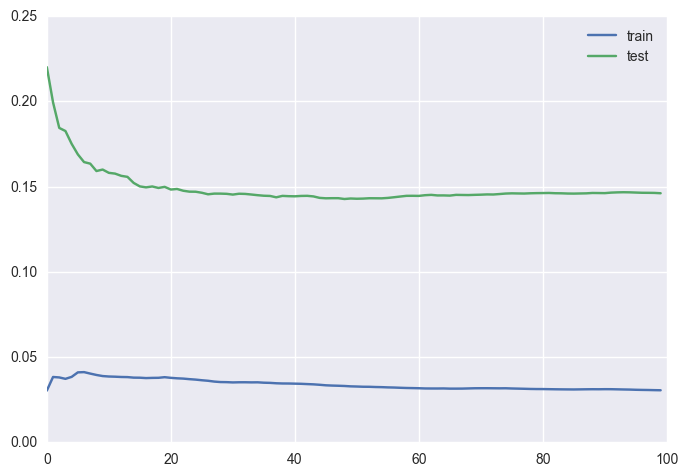

In [20]:
X = pd.get_dummies(X_tr)
X.fillna(X.mean(),inplace = True)

X=X.values
Y = y_tr.values 

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=61)



max_depth = 14 # tree depth
n_trees = 100 # number of trees
max_features = 0.2 # number of random features at each cut
n_samples = X_train.shape[0]
phi = 0.005 # error threshold 
weight = np.ones(n_samples)/n_samples
n = 2


ts = pyl.arange(n_trees)
training_errors = []
test_errors = []
y_pred_train = np.zeros(len(y_train))
y_pred_test = np.zeros(len(y_test))
Sum = 0

for t in range(n_trees):
    
    reg = DecisionTreeRegressor(max_features = max_features,\
                                max_depth = max_depth)
    #call the weak learner with current weight
    reg.fit(X_train,y_train,sample_weight = weight)
    pyl.clf()
    y_p_train = reg.predict(X_train)
    #determinate the absolute relative error
    #of each training predictions
    ARE = np.abs((y_p_train - y_train[:,0])/y_train[:,0])
    #er is the fraction of weight with ARE higher
    #than the threshold
    er = np.sum((ARE>phi)*weight)
    beta = er**n
    #We update the weights 
    #decreasing the weights of the well predicted samples
    #by a factor beta < 1
    weight = weight + ((ARE < phi)*(beta-1))
    #normalise the weights
    weight /= sum(weight)
    #update new predicions values with coefficients depending
    #on beta
    y_pred_test = \
    (y_pred_test*Sum + np.log(1/beta)*reg.predict(X_test))\
    /(Sum + np.log(1/beta))
    
    y_pred_train = \
    (y_pred_train*Sum + np.log(1/beta)*y_p_train)\
    /(Sum + np.log(1/beta))
    Sum += np.log(1/beta)
    
    training_error = \
    sqrt(mean_squared_error(y_pred_train,y_train))
    
    test_error = sqrt(mean_squared_error(y_pred_test,y_test))
    training_errors.append(training_error)
    test_errors.append(test_error)
    pyl.plot(ts[:t+1], training_errors[:t+1],label = 'train')
    pyl.plot(ts[:t+1], test_errors[:t+1],label = 'test')
    pyl.legend()
    display.clear_output(wait=True)
    if(t!= n_trees -1):
        display.display(plt.gcf())
    sleep(.001)
   



We can observe on our data a clear improvement of the test error with the boosting iterations.


An other famous and common used techniques is gradient boosting.
Gradient boosting is based on decision trees, at the i-th step the boosting algorithm outputs the predicators  : $f_i = f_{i-1} + T_i$ where $T_i$ is a decision tree that targets $- \dfrac{\partial L(y_i,f(x_i))}{\partial f(x_i)}_{| f = f_{i-1}}$ where $L$ is the objective loss function, here $L(x,y) = \frac{1}{2}(y - x)^2$.

We implemented a basic version of gradient boosting algorithm (Algorithm 10.3 from "The Element of Statistical Learning")<cite data-cite="friedman2001elements"></cite> with the squared loss function. 
In the case of the squared loss function the decision tree $T_i$ targets $y_i - f_{i-1}$.

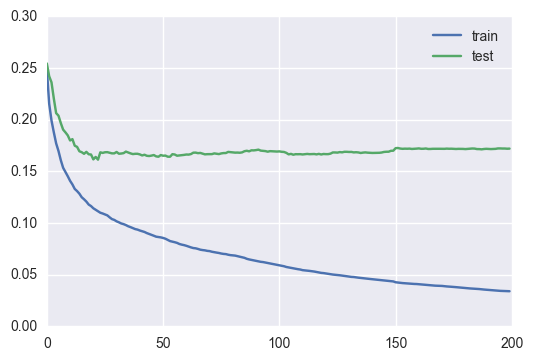

In [6]:
X = pd.get_dummies(X_tr)
X.fillna(X.mean(),inplace = True)

X=X.values
Y = y_tr.values 

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=7)



max_depth = 2 # tree depth
n_trees = 200 # number of trees
max_features = 0.9 # number of random features at each cut
n_samples = X_train.shape[0]



ts = pyl.arange(n_trees)
training_errors = []
test_errors = []
y_pred_train = np.zeros(len(y_train))
y_pred_test = np.zeros(len(y_test))


for t in range(n_trees):
    
    reg = DecisionTreeRegressor(max_features = max_features,\
                                max_depth = max_depth)
    
    reg.fit(X_train,y_train[:,0]-y_pred_train)
    pyl.clf()
    y_pred_test += reg.predict(X_test)
    
    y_pred_train += reg.predict(X_train)
        
    training_error = sqrt(mean_squared_error(y_pred_train,y_train))
    
    test_error = sqrt(mean_squared_error(y_pred_test,y_test))
    training_errors.append(training_error)
    test_errors.append(test_error)
    pyl.plot(ts[:t+1], training_errors[:t+1],label = 'train')
    pyl.plot(ts[:t+1], test_errors[:t+1],label = 'test')
    pyl.legend()
    display.clear_output(wait=True)
    if(t!= n_trees -1):
        display.display(plt.gcf())
    sleep(.001)
   

We see that first the test error decrease a lot with the boosting iterations. However it increases when the boosting iterations are too high. Indeed the training error decrease quickly, and fitting the training targets very well often leads to overfitting.
To prevent overfitting one method is call shrinkage, when updating the predicator , we put a shrinkage coefficient $\nu$ for the new tree. $f_i = f_{i-1} + \nu \; T_i$.

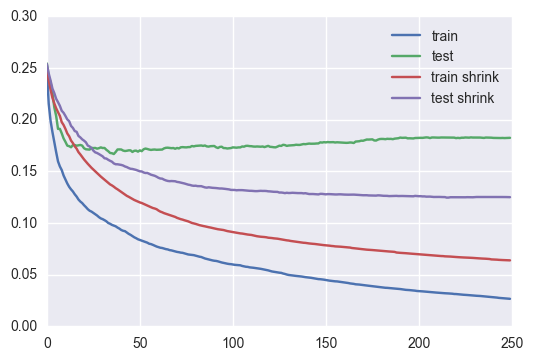

In [7]:
X = pd.get_dummies(X_tr)
X.fillna(X.mean(),inplace = True)

X=X.values
Y = y_tr.values 

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=7)



max_depth = 2 # tree depth
n_trees = 250 # number of trees
max_features = 0.9 # number of random features at each cut
n_samples = X_train.shape[0]
shrink = 0.2


ts = pyl.arange(n_trees)
training_errors = []
test_errors = []
training_errors_sh = []
test_errors_sh = []
y_pred_train_sh = np.zeros(len(y_train))
y_pred_test_sh = np.zeros(len(y_test))
y_pred_train = np.zeros(len(y_train))
y_pred_test = np.zeros(len(y_test))

for t in range(n_trees):
    
    reg = DecisionTreeRegressor(max_features = max_features,\
                                max_depth = max_depth)
    
    reg.fit(X_train,y_train[:,0]-y_pred_train)
    reg_sh = DecisionTreeRegressor(max_features = max_features,\
                                max_depth = max_depth)
    
    reg_sh.fit(X_train,y_train[:,0]-y_pred_train_sh)
    pyl.clf()
    y_pred_test += reg.predict(X_test)
    
    y_pred_train += reg.predict(X_train)
    
    if t == 0 :
        y_pred_test_sh += reg_sh.predict(X_test)
    
        y_pred_train_sh += reg_sh.predict(X_train)
    else :
        y_pred_test_sh += shrink*reg_sh.predict(X_test)
    
        y_pred_train_sh += shrink*reg_sh.predict(X_train)
        
    training_error = sqrt(mean_squared_error(y_pred_train,y_train))
    
    test_error = sqrt(mean_squared_error(y_pred_test,y_test))
    training_errors.append(training_error)
    test_errors.append(test_error)
    
        
    training_error_sh = sqrt(mean_squared_error(y_pred_train_sh,y_train))
    test_error_sh = sqrt(mean_squared_error(y_pred_test_sh,y_test))
    training_errors_sh.append(training_error_sh)
    test_errors_sh.append(test_error_sh)
    
    pyl.plot(ts[:t+1], training_errors[:t+1],label = 'train')
    pyl.plot(ts[:t+1], test_errors[:t+1],label = 'test')
    pyl.plot(ts[:t+1], training_errors_sh[:t+1],label = 'train shrink')
    pyl.plot(ts[:t+1], test_errors_sh[:t+1],label = 'test shrink')
    pyl.legend()
    display.clear_output(wait=True)
    if(t!= n_trees -1):
        display.display(plt.gcf())
    sleep(.001)
   

We see a clear improvement of the gradient boosting with shrinkage regularization.

An other method to improve regularization is subsampling. It consists in using only a part of the training data to build new trees at each iterations of the boosting procedure.

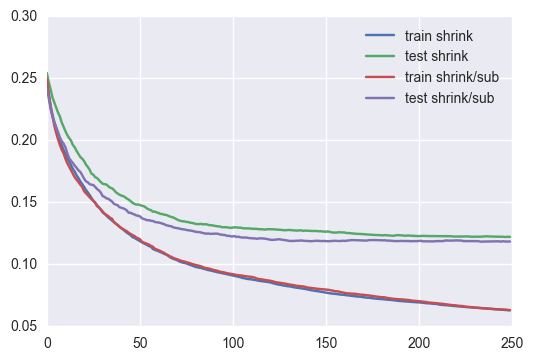

In [15]:
X = pd.get_dummies(X_tr)
X.fillna(X.mean(),inplace = True)

X=X.values
Y = y_tr.values 

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=7)



max_depth = 2 # tree depth
n_trees = 250 # number of trees
max_features = 0.9 # number of random features at each cut
n_samples = X_train.shape[0]
shrink = 0.2
subsample = 0.9

ts = pyl.arange(n_trees)
training_errors = []
test_errors = []
training_errors_sp = []
test_errors_sp = []
y_pred_train_sp = np.zeros(len(y_train))
y_pred_test_sp = np.zeros(len(y_test))
y_pred_train = np.zeros(len(y_train))
y_pred_test = np.zeros(len(y_test))

for t in range(n_trees):
    
    reg = DecisionTreeRegressor(max_features = max_features,\
                                max_depth = max_depth)
    sample = np.random.choice(X_train.shape[0],int(subsample*X_train.shape[0]),replace = False)
    
    reg.fit(X_train,y_train[:,0]-y_pred_train)
    
    reg_sp = DecisionTreeRegressor(max_features = max_features,\
                                max_depth = max_depth)
    
    reg_sp.fit(X_train[sample],y_train[sample,0]-y_pred_train_sp[sample])
    pyl.clf()
    
    if t == 0 :
        y_pred_test_sp += reg_sp.predict(X_test)
    
        y_pred_train_sp += reg_sp.predict(X_train)
        
        y_pred_test += reg.predict(X_test)
    
        y_pred_train += reg.predict(X_train)
    else :
        y_pred_test_sp += shrink*reg_sp.predict(X_test)
    
        y_pred_train_sp += shrink*reg_sp.predict(X_train)
        
        y_pred_test += shrink*reg.predict(X_test)
    
        y_pred_train += shrink*reg.predict(X_train)
        
    training_error = sqrt(mean_squared_error(y_pred_train,y_train))
    test_error = sqrt(mean_squared_error(y_pred_test,y_test))
    training_errors.append(training_error)
    test_errors.append(test_error)
    
        
    training_error_sp = sqrt(mean_squared_error(y_pred_train_sp,y_train))
    test_error_sp = sqrt(mean_squared_error(y_pred_test_sp,y_test))
    training_errors_sp.append(training_error_sp)
    test_errors_sp.append(test_error_sp)
    
    pyl.plot(ts[:t+1], training_errors[:t+1],label = 'train shrink')
    pyl.plot(ts[:t+1], test_errors[:t+1],label = 'test shrink')
    pyl.plot(ts[:t+1], training_errors_sp[:t+1],label = 'train shrink/sub')
    pyl.plot(ts[:t+1], test_errors_sp[:t+1],label = 'test shrink/sub')
    pyl.legend()
    display.clear_output(wait=True)
    if(t!= n_trees -1):
        display.display(plt.gcf())
    sleep(.001)
   

We can observe again an improvement of the test error when combining shrinkage and subsampling. Cross validation should be used to find the optimal hyper-paramters for $shrink$ and $subsample$. 

In practice we use the $xgboost$ library, which provides a very fast implementation of gradient boosting with a lot more parameters. 

## Combining our models (Mathieu)

expliquer les méthodes pour combiner les algos

We’ve already seen different methods to combine basic models to obtain a more performant one :
- **Bagging** : We use random part of the training data (with or without bootstrapping) to train the base predicators and then take the mean of their predictions. That’s the strategies of Random Forest or Extra Trees. 
- **Boosting** : We construct a sequence of base predicators iteratively based on the performances of the previous ones. We saw illustrations with AdaBoost and Gradient Boosting. 

Here we are going to introduce **stacking** method. Its principle may remind of the cross-validation procedure. Indeed in stacking, you consider a K-folds partition of your training, and for each base predicator you want to stack in you create the column defined blow-wise with the i th block corresponding to the prediction of the i-th fold of the training data by your current base predicator trained on the rest of the training data. This gives you a new feature column for the training data. To obtain this new feature column for the test set you can either get K columns corresponding to the prediction on the test set by the base estimator trained on the whole data except one of the fold (for each fold) and then take the average of the K columns, or simply get use the prediction on the test set by the base predicator trained on the whole data. 

Here an illustration(citer https://www.kaggle.com/getting-started/18153#post103381) of this method for one base estimator :

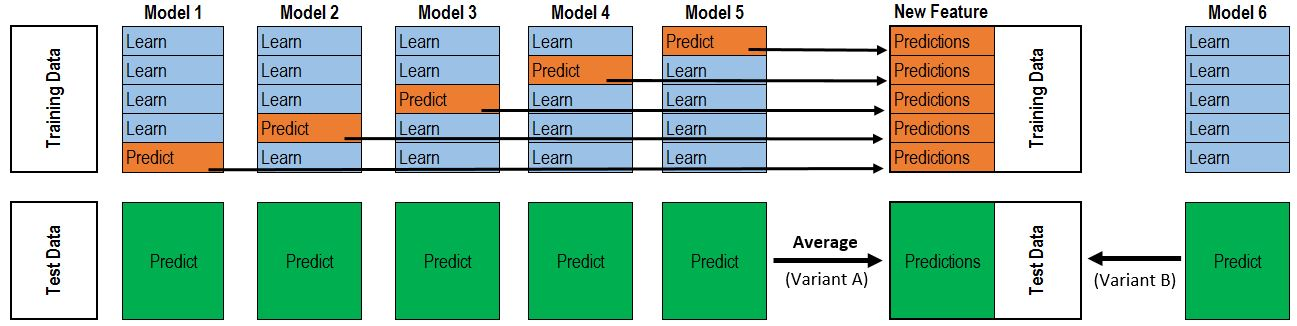

In [1]:
from IPython.display import Image
Image("stacking.jpeg")

When can repeat this procedure for each estimator we want to use in our stacking method.
And we eventually obtain a train and a test matrix of shape *number of samples* \* *number of estimators*.
We use these new matrix as our new data. And fit a new estimators on the train matrix with the same labels y. And use the new test matrix to get the prediction we wanted.

Here is an implementation of the variante A :

In [3]:
import numpy as np
from sklearn.cross_validation import KFold

class Ensemble(object):
    def __init__(self, n_folds, stacker, base_models):
        self.n_folds = n_folds
        self.stacker = stacker
        self.base_models = base_models
        
    def get_params(self,deep =True):
        out = dict()
        out['n_folds']= self.n_folds
        out['stacker'] = self.stacker
        out['base_models'] = self.base_models
        return out
        
    def fit(self,X,y):
        X = np.array(X)
        y = np.array(y)
        self.folds = list(KFold(len(y), n_folds=self.n_folds, shuffle=True, random_state=42))
        S_train = np.zeros((X.shape[0], len(self.base_models)))
        for i, clf in enumerate(self.base_models):
            for j, (train_idx, test_idx) in enumerate(self.folds):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]
                # y_holdout = y[test_idx]
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_holdout)[:]
                S_train[test_idx, i] = y_pred
                self.stacker.fit(S_train,y)
                
    def predict(self,X):
        X = np.array(X)
        S_test = np.zeros((X.shape[0], len(self.base_models)))
        for i, clf in enumerate(self.base_models):
            S_test_i = np.zeros((X.shape[0], len(self.folds)))
            for j, (train_idx, test_idx) in enumerate(self.folds):
                S_test_i[:, j] = clf.predict(X)[:]
            S_test[:, i] = S_test_i.mean(1)
        y_pred = self.stacker.predict(S_test)[:]
        return y_pred